# _Rascunhos_


## Dataset Preparation


In [1]:
import os
import cv2
from pathlib import Path
import random
import torch
import glob
from shutil import copyfile

In [2]:
#from ftplib import FTP

#ftp = FTP('ftp2.mmt.se')

# @hidden_cell
#ftp.login(user='900036-JCU_Image_Data', passwd='LwARfJfM')

#ftp.cwd('/Data examples/1_Visibility/')
#ftp.retrlines('LIST')

## Convert the videos (.mp4) to images (.png)


In [3]:

def convert_mp4_to_png(video_path, frame_path):
  """
  video_path -> Path to the video to convert with the video name.
  frame path -> Path to the folder in which frames should be saved and the video name as index to add the frame info.
  """
  os.chdir('E:/')
  vidcap = cv2.VideoCapture(video_path)
  success,image = vidcap.read()
  count = 0
  while success:
    frame_path_mod = frame_path+"_frame%d.png" % count
    cv2.imwrite(frame_path_mod, image)     # save frame as JPEG file      
    success,image = vidcap.read()

    if(count % 500 == 0):
      print(f"Frame:{count} | Success:{success}")
    count += 1

In [4]:
def check_dir(DATASET_PATH):
    """
        Verifies if the path of the Dataset is created
    """
    if DATASET_PATH.is_dir():
        pass
    else:
        print(f"{DATASET_PATH} does not exist, creating one...")
        DATASET_PATH.mkdir(parents=True, exist_ok=True)

In [5]:
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} frames in '{dirpath}'.")

In [6]:
def convert_all(DATASET_PATH, LIST_PATHS, RAW_DATA_PATH):
    """
    Convert all videos into images.
    """
    
    check_dir(DATASET_PATH)

    for i in range(len(LIST_PATHS)):
        folders = os.path.split(LIST_PATHS[i])[0]
        dataset_full_path_folders = DATASET_PATH / folders
        check_dir(dataset_full_path_folders)

        raw_full_path_folders = RAW_DATA_PATH + LIST_PATHS[i]

        os.chdir('E:/')
        videos = glob.glob(raw_full_path_folders+"/*.mp4")

        for j, video in enumerate(videos):
            video_name = dataset_full_path_folders + "/" + os.path.split(LIST_PATHS[i])[1] + "_" + str(j)
            convert_mp4_to_png(video,video_name)

In [7]:
#Change disk directory
base_path = Path("G:/Dissertation/")
if(Path().cwd() != Path(r"G:\Dissertation")):
    os.chdir(base_path)

In [8]:
#Define data_paths
raw_data_path = Path("raw_data/Data examples/")
raw_visibility_path = raw_data_path / Path("1_Visibility/")
raw_quality_path = raw_data_path/ Path("2_Quality/")
dataset_path = Path("dataset/")

In [9]:
list_paths = []
VG_path = Path("/1_Very_Good/Vis_Vgood_1")
list_paths.append(VG_path)
G_path = Path("/2_Good/Vis_good_1")
list_paths.append(G_path)
M_path = Path("/3_Moderate/Vis_Mod_1")
list_paths.append(M_path)
M_path1 = Path("/3_Moderate/Vis_Mod_2")
list_paths.append(M_path1)
P_path = Path("/4_Poor/Vis_Poor_1")
list_paths.append(P_path)
P_path1 = Path("/4_Poor/Vis_Poor_2")
list_paths.append(P_path1)
VP_path = Path("/5_Very_Poor/Vis_Vpoor_1")
list_paths.append(VP_path)


#convert_all(DATASET_PATH, LIST_PATHS, RAW_DATA_PATH)

In [10]:
walk_through_dir(dataset_path)

There are 5 directories and 0 frames in 'dataset'.
There are 0 directories and 22440 frames in 'dataset\1_Very_Good'.
There are 0 directories and 22486 frames in 'dataset\2_Good'.
There are 0 directories and 44942 frames in 'dataset\3_Moderate'.
There are 0 directories and 44930 frames in 'dataset\4_Poor'.
There are 0 directories and 22450 frames in 'dataset\5_Very_Poor'.


## Split data into trainning and testing


In [11]:
classes = os.listdir(dataset_path)
classes

['1_Very_Good', '2_Good', '3_Moderate', '4_Poor', '5_Very_Poor']

In [12]:
# def split_data(DATA_SOURCE, DATA_TRAINING, DATA_TESTING, DATA_VALIDATION, SPLIT_SIZE):
#     """
#     Split all of the data into training and testing with a split size.

#     SOURCE -> Folder that has the dataset folder.

#     TRAINING -> Folder where to save the training data.

#     TESTING -> Folder where to save the testing data.
    
#     SPLIT_SIZE -> ratio of training to testing data from [trainning(0-1),validation(0-1),testing(0-1)] make sure that the sum is 1.
#     """

#     if(sum(SPLIT_SIZE) != 1):
#         print("SPLIT_SIZE is not valid")
#         return
    
#     check_dir(Path(DATA_TRAINING))
#     check_dir(Path(DATA_TESTING))
#     check_dir(Path(DATA_VALIDATION))

#     for dir in os.listdir(DATA_SOURCE):
#             TRAINING = DATA_TRAINING / dir
#             TESTING = DATA_TESTING / dir
#             VALIDATION = DATA_VALIDATION / dir
#             check_dir(Path(TRAINING))
#             check_dir(Path(TESTING))
#             check_dir(Path(VALIDATION))

#             SOURCE = DATA_SOURCE / dir

#             files = []
#             print('Split Data')
#             for filename in os.listdir(SOURCE):
#                 file = SOURCE / filename
#                 if os.path.getsize(file) > 0:
#                     files.append(filename)
#                 else:
#                     print(filename + "is zero lenght, so ignoring.")
            
#             training_length = int(len(files)* SPLIT_SIZE[0])
#             validation_length = int(len(files)* SPLIT_SIZE[1])
#             testing_length = int(len(files)* SPLIT_SIZE[2])

#             print('SOURCE: ',SOURCE, '\n TRAINING', TRAINING, '\n ',len(files))
#             print('training_length:',training_length)
#             print('validation_length:',validation_length)
#             print('testing_length:',testing_length)

#             shuffled_set = random.sample(files, len(files))
#             training_set = shuffled_set[0:training_length]
#             validation_set = shuffled_set[training_length:training_length+validation_length]
#             testing_set= shuffled_set[training_length+validation_length:]
            
#             for filename in training_set:
#                 this_file = SOURCE / filename
#                 destination = TRAINING / filename
#                 copyfile(this_file, destination)

#             for filename in validation_set:
#                 this_file = SOURCE / filename
#                 destination = VALIDATION / filename
#                 copyfile(this_file, destination)
            
#             for filename in testing_set:
#                 this_file = SOURCE / filename
#                 destination = TESTING / filename
#                 copyfile(this_file, destination)
        

In [13]:
test_dir =  Path("dataset_split_1/test/")
validation_dir =  Path("dataset_split_1/validation/")
train_dir = Path("dataset_split_1/train/")

SPLIT_SIZE = [0.8,0.1,0.1]

#split_data(dataset_path,train_dir,test_dir,validation_dir,SPLIT_SIZE)

## Set up device


In [14]:
!nvidia-smi

Mon Feb 27 16:51:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.01       Driver Version: 516.01       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   66C    P8     7W /  N/A |   1686MiB /  8192MiB |      9%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
torch.cuda.get_device_name()

'NVIDIA GeForce GTX 1070'

In [17]:
os.cpu_count()

12

## Visualize dataset


In [18]:
walk_through_dir(dataset_path)

There are 5 directories and 0 frames in 'dataset'.
There are 0 directories and 22440 frames in 'dataset\1_Very_Good'.
There are 0 directories and 22486 frames in 'dataset\2_Good'.
There are 0 directories and 44942 frames in 'dataset\3_Moderate'.
There are 0 directories and 44930 frames in 'dataset\4_Poor'.
There are 0 directories and 22450 frames in 'dataset\5_Very_Poor'.


In [19]:
dataset_split_path1 = Path("dataset_split_1/")
data_dir = Path(dataset_split_path1)

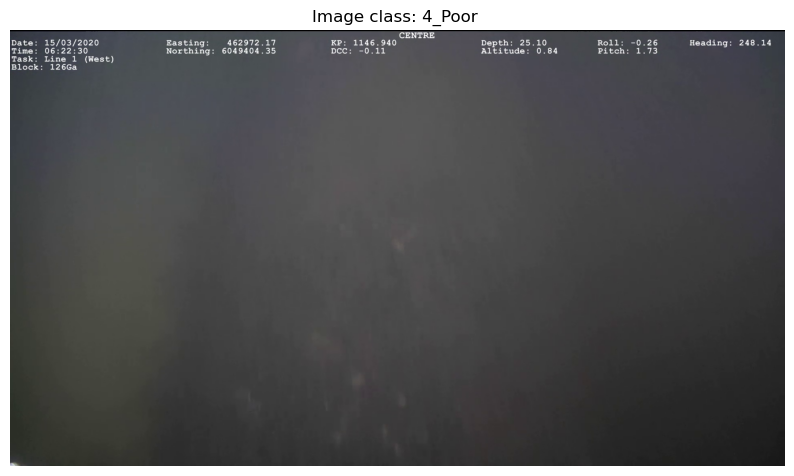

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from PIL import Image

# Set seed
#random.seed(42)

# 1. Get all image paths 
data_path_list = list(dataset_split_path1.glob("*/*/*.png"))

# 2. Pick a random image path
random_image_path = random.choice(data_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} ")
plt.axis(False);

## DataLoader


In [21]:
import torch

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [22]:
def plot_transformed_images(image_paths: list, transform, n=3, seed=None):
  """
  Selects random images from a path of images and loads/transforms 
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

In [23]:
# Write a transform for image
data_transform = transforms.Compose([
  transforms.Resize(size=(224, 224)),
  # Flip the images randomly on the horizontal and vertical
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.RandomVerticalFlip(p=0.5),
  # Turn the image into a torch.Tensor
  transforms.ToTensor() 
])

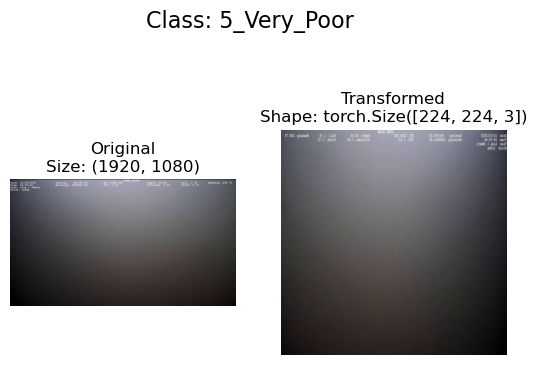

In [24]:
plot_transformed_images(image_paths=data_path_list,
                        transform=data_transform,
                        n=1,
                        seed=None)

In [25]:
from typing import Tuple, Dict, List

#Get classes
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [26]:
from torch.utils.data import Dataset
import pathlib

# Create custom dataset class
class ImageFolderCustom(Dataset):
  def __init__(self, 
               targ_dir: str, 
               transform=None):

    self.paths = list(pathlib.Path(targ_dir).glob("*/*.png"))

    self.transform = transform

    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)
  
  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name 
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label


In [27]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
                                      transforms.Resize(size=(224, 224)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.RandomVerticalFlip(p=0.5),
                                      transforms.ToTensor() 
])

test_transforms = transforms.Compose([
                                      transforms.Resize(size=(224, 224)),
                                      transforms.ToTensor()
])

validation_transforms = transforms.Compose([
                                      transforms.Resize(size=(224, 224)),
                                      transforms.ToTensor()
])

In [28]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

validation_data_custom = ImageFolderCustom(targ_dir=validation_dir,
                                           transform=test_transforms)

In [29]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target 

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

validation_data = datasets.ImageFolder(root=validation_dir,
                                 transform=data_transform)


# Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

validation_dataloader = DataLoader(dataset=validation_data,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)




## ResNet50


In [30]:
#My implementation
import torch.nn as nn

#Create ResNet50 Model Class
class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, identity_downsample=None, stride=1):
        super(ResBlock, self).__init__()
        self.expansion = 4

        self.sub_Block1= nn.Sequential(
            nn.Conv2d(in_channels,out_channels, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(out_channels)
        )

        self.sub_Block2= nn.Sequential(
            nn.Conv2d(out_channels,out_channels, kernel_size=3, stride=stride, padding=1),
            nn.BatchNorm2d(out_channels)
        )

        self.sub_Block3= nn.Sequential(
            nn.Conv2d(out_channels,out_channels*4, kernel_size=1, stride=1, padding=0),
            nn.BatchNorm2d(out_channels*4)
        )
        
        # self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        # self.bn2 = nn.BatchNorm2d(out_channels)
        # self.conv3 = nn.Conv2d(out_channels, out_channels*self.expansion, kernel_size=1, stride=1, padding=0)
        # self.bn3 = nn.BatchNorm2d(out_channels*self.expansion)
        self.relu = nn.ReLU()
        self.identity_downsample = identity_downsample
        self.out_channels = out_channels

    def forward(self,x):
        identity = x

        x = self.sub_Block1(x)
        x = self.sub_Block2(x)
        x = self.sub_Block3(x)
        x = self.relu(x)

        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)
        
        x += identity
        x = self.relu(x)

        return x


class ResNet(nn.Module): # [3, 4, 6, 3]
    def __init__(self, block, layers, image_channels, num_classes):
        super(ResNet, self).__init__()

        self.in_channels = 64

        self.initBlock = nn.Sequential(
            nn.Conv2d(image_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2,padding=1), 
        )

        #Resnet Layers
        self.layer1 = self._make_layer(block, layers[0], out_channels=64, stride = 1)
        self.layer2 = self._make_layer(block, layers[1], out_channels=128, stride = 2)
        self.layer3 = self._make_layer(block, layers[2], out_channels=256, stride = 2)
        self.layer4 = self._make_layer(block, layers[3], out_channels=512, stride = 2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512*4, num_classes)
    
    def forward(self,x):
        x = self.initBlock(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

    def _make_layer(self, block, num_blocks, out_channels, stride):
        identity_downsample = None
        layers=[]
        if stride != 1 or self.in_channels != out_channels * 4:
            identity_downsample = nn.Sequential(nn.Conv2d(self.in_channels, out_channels*4, kernel_size=1,stride=stride),
                                                nn.BatchNorm2d(out_channels*4))

        layers.append(block(self.in_channels, out_channels, identity_downsample, stride))
        self.in_channels = out_channels*4 

        for i in range(num_blocks -1):
            layers.append(ResBlock(self.in_channels, out_channels)) 
        
        return nn.Sequential(*layers)



def ResNet50(img_channels=3, num_classes=5):
    return ResNet(ResBlock, [3, 4, 6, 3], img_channels, num_classes)

In [31]:
model = ResNet50().to(device)
model

ResNet(
  (initBlock): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer1): Sequential(
    (0): ResBlock(
      (sub_Block1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (sub_Block2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (sub_Block3): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU()
      (identity_downsample):

## Train and test loop


In [32]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

KeyboardInterrupt: 

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# Try a forward pass
model(image_batch.to(device))

In [ ]:
#train step
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):

    model.train()

    train_loss, train_acc = 0,0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    
    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader) 
    return train_loss, train_acc 

In [ ]:
#validation step
def validation_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  validation_loss, validation_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader): 
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      validation_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(validation_pred_logits, y)
      validation_loss += loss.item()

      # Calculate the accuracy
      validation_pred_labels = validation_pred_logits.argmax(dim=1)
      validation_acc += ((validation_pred_labels == y).sum().item()/len(validation_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  validation_loss = validation_loss / len(dataloader)
  validation_acc = validation_acc / len(dataloader)
  return validation_loss, validation_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          validation_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5, 
          device=device):
  
  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "validation_loss": [],
             "validation_acc": []}
  
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    validation_loss, validation_acc = validation_step(model=model,
                                    dataloader=validation_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    
    # 4. Print out what's happening
    print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {validation_loss:.4f} | "
          f"test_acc: {validation_acc:.4f}"
        )

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["validation_loss"].append(validation_loss)
    results["validation_acc"].append(validation_acc)
  
  # 6. Return the filled results at the end of the epochs
  return results

In [ ]:
import os
import cv2
from pathlib import Path
import random
import torch
import glob
from shutil import copyfile

In [ ]:
import os
#Change disk directory
base_path = Path("G:/Dissertation/")
if(Path().cwd() != Path(r"G:\Dissertation")):
    os.chdir(base_path)

In [ ]:
#Define data_paths
raw_data_path = Path("raw_data/Data examples/")
raw_visibility_path = raw_data_path / Path("1_Visibility/")
raw_quality_path = raw_data_path/ Path("2_Quality/")
dataset_path = Path('dataset/')

In [ ]:
from data_preparation import split_data

data_dir = Path("small_split/")
split_size = [0.8,0.1,0.1]

#split_data(dataset_path, data_dir, split_size, num_img_class=1000)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
from utils import save_model, eval_model, accuracy_fn
import torch.nn as nn
from pathlib import Path
from ResNet50 import ResNet50
import torch

loss_fn = nn.CrossEntropyLoss()

models_path = Path('Models/')
model_name = 'ResNet50_1000_class_5_epoch.pth'

model_path = models_path / model_name
loaded_model = ResNet50()
loaded_model.load_state_dict(torch.load(model_path))

loaded_model.to(device)

loaded_model_results = eval_model(model=loaded_model,
                                  data_loader=validation_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)

loaded_model_results